# Importing Libraries

In [178]:
import numpy as np
import pandas as pd #I will import the dataset as a pandas dataframe
import matplotlib.pyplot as plt #The graphs for the dataset will be created using this library
import urllib #Since I am importing pre-processed dataset which is in a url, so urlilb in-built package will help me with importing the dataset. 

# Importing the dataset

In [2]:
dataset_link ='https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/diabetes_scale' #This is the link where the dataset is.

# Now I will simply use the response module to load the dataset from this link

raw_data =urllib.request.urlopen(dataset_link)

#Now I will load this dataset as a pandas dataframe, delim_whitespace=True specifies that the whitespace is the delimiter and header=None specifies that the there is no heading row in the datset.
dataset = pd.read_csv(raw_data,delim_whitespace=True,header=None)

In [3]:
dataset.shape

(768, 9)

In [4]:
dataset.head()

,0,1,2,3,4,5,6,7,8
0,-1,1:-0.294118,2:0.487437,3:0.180328,4:-0.292929,5:-1,6:0.00149028,7:-0.53117,8:-0.0333333
1,1,1:-0.882353,2:-0.145729,3:0.0819672,4:-0.414141,5:-1,6:-0.207153,7:-0.766866,8:-0.666667
2,-1,1:-0.0588235,2:0.839196,3:0.0491803,4:-1,5:-1,6:-0.305514,7:-0.492741,8:-0.633333
3,1,1:-0.882353,2:-0.105528,3:0.0819672,4:-0.535354,5:-0.777778,6:-0.162444,7:-0.923997,8:-1
4,-1,1:-1,2:0.376884,3:-0.344262,4:-0.292929,5:-0.602837,6:0.28465,7:0.887276,8:-0.6


In [5]:
#Now basically, an entry let's say "1:-0.294118" tells us that the for a particular row, this is the entry in the 1st column but this will create problems for training as I need raw data.

#I need to remove the column numbers from the data in the rows and for this I will use the replace() function and use regular expression.

dataset = dataset.replace({r'\d+:':''},regex=True) #So, '\d+' stands for a number and I have basically replaced this number with a blank. 

In [6]:
dataset.head()

,0,1,2,3,4,5,6,7,8
0,-1,-0.294118,0.487437,0.180328,-0.292929,-1,0.00149028,-0.53117,-0.0333333
1,1,-0.882353,-0.145729,0.0819672,-0.414141,-1,-0.207153,-0.766866,-0.666667
2,-1,-0.0588235,0.839196,0.0491803,-1,-1,-0.305514,-0.492741,-0.633333
3,1,-0.882353,-0.105528,0.0819672,-0.535354,-0.777778,-0.162444,-0.923997,-1
4,-1,-1,0.376884,-0.344262,-0.292929,-0.602837,0.28465,0.887276,-0.6


In [7]:
#Checking data types of each column
dataset.dtypes

0     int64
1    object
2    object
3    object
4    object
5    object
6    object
7    object
8    object
dtype: object

In [8]:
#Now, here except the first column, every column in this dataset is of object type so we need to change this float type using astype()

dataset.iloc[:,1:] = dataset.iloc[:,1:].astype(float)

In [9]:
#Checking data types of each column
dataset.dtypes

0     int64
1    object
2    object
3    object
4    object
5    object
6    object
7    object
8    object
dtype: object

In [10]:
#The reason why it's showing object data type is could be due to missing value, so i will check for that.
dataset.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    9
dtype: int64

In [11]:
#Indeed there was, now I wil simply replace the values in 9th column with the mean of this column because there's only 9 values missing and won't introduce too much bias in data.
dataset[8] = dataset[8].fillna(dataset[8].mean())

In [12]:
dataset.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [13]:
dataset.head()

,0,1,2,3,4,5,6,7,8
0,-1,-0.294118,0.487437,0.180328,-0.292929,-1.0,0.00149,-0.53117,-0.033333
1,1,-0.882353,-0.145729,0.081967,-0.414141,-1.0,-0.207153,-0.766866,-0.666667
2,-1,-0.058824,0.839196,0.04918,-1.0,-1.0,-0.305514,-0.492741,-0.633333
3,1,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000
4,-1,-1.0,0.376884,-0.344262,-0.292929,-0.602837,0.28465,0.887276,-0.600000


# Separating the labels from other features

In [14]:
#Now, I will create a matrix of features and a matrix of labels i.e. the target

X = dataset.iloc[:,1:] #Choose all rows but only retain data 2nd column onwards
y = dataset.iloc[:,0] #Choose all rows but only retain data of the first column

In [15]:
X.head()

,1,2,3,4,5,6,7,8
0,-0.294118,0.487437,0.180328,-0.292929,-1.0,0.00149,-0.53117,-0.033333
1,-0.882353,-0.145729,0.081967,-0.414141,-1.0,-0.207153,-0.766866,-0.666667
2,-0.058824,0.839196,0.04918,-1.0,-1.0,-0.305514,-0.492741,-0.633333
3,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000
4,-1.0,0.376884,-0.344262,-0.292929,-0.602837,0.28465,0.887276,-0.600000


In [16]:
X.dtypes

1     object
2     object
3     object
4     object
5     object
6     object
7     object
8    float64
dtype: object

In [17]:
X.isnull().sum()

1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [18]:
y.head()

0   -1
1    1
2   -1
3    1
4   -1
Name: 0, dtype: int64

In [19]:
y.isnull().sum()

0

In [20]:
X.shape

(768, 8)

In [21]:
y.shape

(768,)

# Splitting the dataset

In [22]:
#Now I will split the dataset into training set and the test test. I will use the train_test_split method from sklearn to do this
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2) #20% of my dataset will be test data.

In [23]:
X_train.head()

,1,2,3,4,5,6,7,8
270,0.176471,0.015075,0.409836,-0.252525,-1.0,0.359165,-0.096499,-0.433333
565,-0.764706,-0.045226,-0.114754,-0.717172,-0.791962,-0.222057,-0.427839,-0.966667
338,0.058824,0.527638,0.278689,-0.313131,-0.595745,0.019374,-0.304014,-0.600000
512,0.058824,-0.085427,0.114754,-1.0,-1.0,-0.278688,-0.895816,0.233333
212,-0.176471,0.798995,0.557377,-0.373737,-1.0,0.019374,-0.926558,0.300000


In [24]:
X_test.head()

,1,2,3,4,5,6,7,8
334,-0.882353,-0.045226,-0.016393,-0.636364,-0.862884,-0.28763,-0.844577,-0.966667
637,-0.764706,-0.055276,0.245902,-0.636364,-0.843972,-0.058122,-0.512383,-0.933333
540,-0.058824,0.005025,0.213115,-0.191919,-0.491726,0.174367,-0.502135,-0.266667
469,-0.294118,0.547739,0.278689,-0.171717,-0.669031,0.374069,-0.578992,-0.800000
120,-1.0,0.628141,0.245902,0.131313,-0.763593,0.585693,-0.418446,-0.866667


In [25]:
y_test.head()

334    1
637    1
540   -1
469    1
120   -1
Name: 0, dtype: int64

In [26]:
y_train.head()

270   -1
565    1
338   -1
512    1
212    1
Name: 0, dtype: int64

# Implementing a Perceptron using Sklearn

In [27]:
from sklearn.linear_model import Perceptron 
perc = Perceptron() #I have a created an instance of the Perceptron class

In [28]:
# Now I will train the perceptron on the training set

perc.fit(X_train,y_train)

Perceptron()

In [29]:
#Now I will use this model to make predictions on the test set.

y_predict = perc.predict(X_test)

In [124]:
#Now, I will check the accuracy of the perceptron using the accuracy_score method from sklearn

from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_test,y_predict)
print(f'Accuracy Score: {round(acc1,3)}')

Accuracy Score: 0.662


In [125]:
#Now, I will check, precsion score, recall score and f1 score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

precision1 = precision_score(y_test,y_predict)
recall1 = recall_score(y_test,y_predict)
f1_score_1 = f1_score(y_test,y_predict)
print(f'Precision Score: {round(precision1,3)}')
print(f'Recall Score: {round(recall1,3)}')
print(f'F1 Score: {round(f1_score_1,3)}')

Precision Score: 0.664
Recall Score: 0.99
F1 Score: 0.795


# Implementing Naive-Bayes Classification Model

In [126]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [127]:
#Training the model
nb.fit(X_train,y_train)

GaussianNB()

In [128]:
#Making predictions using this model
y_predict_2 = nb.predict(X_test)

In [130]:
#Calculating Performance Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

precision2 = precision_score(y_test,y_predict_2)
acc2 = accuracy_score(y_test,y_predict_2)
recall2 = recall_score(y_test,y_predict_2)
f1_score_2 = f1_score(y_test,y_predict_2)
print(f'Precision Score: {round(precision2,3)}')
print(f'Accuracy Score: {round(acc2,3)}')
print(f'Recall Score: {round(recall2,3)}')
print(f'F1 Score: {round(f1_score_2,3)}')

Precision Score: 0.829
Accuracy Score: 0.786
Recall Score: 0.853
F1 Score: 0.841


# Implementing Logistic Regression Model

In [36]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [37]:
#Training the model
lg.fit(X_train,y_train)

LogisticRegression()

In [38]:
#Making predictions using this model
y_predict_3 = lg.predict(X_test)

In [132]:
#Calculating Performance Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

precision3 = precision_score(y_test,y_predict_3)
acc3 = accuracy_score(y_test,y_predict_3)
recall3 = recall_score(y_test,y_predict_3)
f1_score_3 = f1_score(y_test,y_predict_3)
print(f'Precision Score: {round(precision3,3)}')
print(f'Accuracy Score: {round(acc3,3)}')
print(f'Recall Score: {round(recall3,3)}')
print(f'F1 Score: {round(f1_score_3,3)}')

Precision Score: 0.812
Accuracy Score: 0.792
Recall Score: 0.892
F1 Score: 0.85


# Implementing KNN Model

In [133]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [134]:
#Training the model
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [135]:
#Making predictions using this model
y_predict_4 = knn.predict(X_test)

In [136]:
#Calculating Performance Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

precision4 = precision_score(y_test,y_predict_4)
acc4 = accuracy_score(y_test,y_predict_4)
recall4 = recall_score(y_test,y_predict_4)
f1_score_4 = f1_score(y_test,y_predict_4)
print(f'Precision Score: {round(precision4,3)}')
print(f'Accuracy Score: {round(acc4,3)}')
print(f'Recall Score: {round(recall4,3)}')
print(f'F1 Score: {round(f1_score_4,3)}')

Precision Score: 0.796
Accuracy Score: 0.753
Recall Score: 0.843
F1 Score: 0.819


# Implementing Decison Tree Model

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [45]:
#Training the model
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [46]:
#Making predictions using this model
y_predict_5 = dt.predict(X_test)

In [137]:
#Calculating Performance Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

precision5 = precision_score(y_test,y_predict_5)
acc5 = accuracy_score(y_test,y_predict_5)
recall5 = recall_score(y_test,y_predict_5)
f1_score_5 = f1_score(y_test,y_predict_5)
print(f'Precision Score: {round(precision5,3)}')
print(f'Accuracy Score: {round(acc5,3)}')
print(f'Recall Score: {round(recall5,3)}')
print(f'F1 Score: {round(f1_score_5,3)}')

Precision Score: 0.832
Accuracy Score: 0.747
Recall Score: 0.775
F1 Score: 0.802


# Applying Some Changes to Perceptron

In [138]:
#In the previous implemention,the default model was imported and implemented however, this time, I will try to change some parameters of the Perceptron class and see if we see any improvement

In [139]:
#I will change the eta0 and the max_iter attribute in the Perceptron class of sklearn

In [140]:
from sklearn.linear_model import Perceptron

perc2 = Perceptron(eta0=0.5,max_iter=1000)

In [141]:
perc2.fit(X_train,y_train)

Perceptron(eta0=0.5)

In [142]:
#Now I will use this model to make predictions on the test set.

y_predict_6 = perc2.predict(X_test)

In [143]:
#Calculating Performance Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

precision6 = precision_score(y_test,y_predict_6)
acc6 = accuracy_score(y_test,y_predict_6)
recall6 = recall_score(y_test,y_predict_6)
f1_score_6 = f1_score(y_test,y_predict_6)
print(f'Precision Score: {round(precision6,3)}')
print(f'Accuracy Score: {round(acc6,3)}')
print(f'Recall Score: {round(recall6,3)}')
print(f'F1 Score: {round(f1_score_6,3)}')

Precision Score: 0.664
Accuracy Score: 0.662
Recall Score: 0.99
F1 Score: 0.795


In [144]:
#Now I will increase the et0 parameter and the max_iter parameter

In [161]:
from sklearn.linear_model import Perceptron

perc3 = Perceptron(eta0=0.04,max_iter=2000,class_weight='balanced')

In [162]:
perc3.fit(X_train,y_train)

Perceptron(class_weight='balanced', eta0=0.04, max_iter=2000)

In [170]:
#Now I will use this model to make predictions on the test set.

y_predict_7 = perc3.predict(X_test)

In [171]:
#Calculating Performance Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

precision7 = precision_score(y_test,y_predict_7)
acc7 = accuracy_score(y_test,y_predict_7)
recall7 = recall_score(y_test,y_predict_7)
f1_score_7 = f1_score(y_test,y_predict_7)
print(f'Precision Score: {round(precision7,3)}')
print(f'Accuracy Score: {round(acc7,3)}')
print(f'Recall Score: {round(recall7,3)}')
print(f'F1 Score: {round(f1_score_7,3)}')

Precision Score: 0.889
Accuracy Score: 0.383
Recall Score: 0.078
F1 Score: 0.144


In [172]:
from sklearn.linear_model import Perceptron

perc4 = Perceptron(eta0=0.01,max_iter=2000,class_weight='balanced',tol=1e-2)

In [173]:
perc4.fit(X_train,y_train)

Perceptron(class_weight='balanced', eta0=0.01, max_iter=2000, tol=0.01)

In [174]:
#Now I will use this model to make predictions on the test set.

y_predict_8 = perc4.predict(X_test)

In [175]:
#Calculating Performance Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

precision8 = precision_score(y_test,y_predict_8)
acc8 = accuracy_score(y_test,y_predict_8)
recall8 = recall_score(y_test,y_predict_8)
f1_score_8 = f1_score(y_test,y_predict_8)
print(f'Precision Score: {round(precision8,3)}')
print(f'Accuracy Score: {round(acc8,3)}')
print(f'Recall Score: {round(recall8,3)}')
print(f'F1 Score: {round(f1_score_8,3)}')

Precision Score: 0.705
Accuracy Score: 0.708
Recall Score: 0.961
F1 Score: 0.813


In [176]:
#Plotting my results on graph

In [177]:
#Creating a bar chart for accuracy score

<Figure size 20000x10000 with 0 Axes>

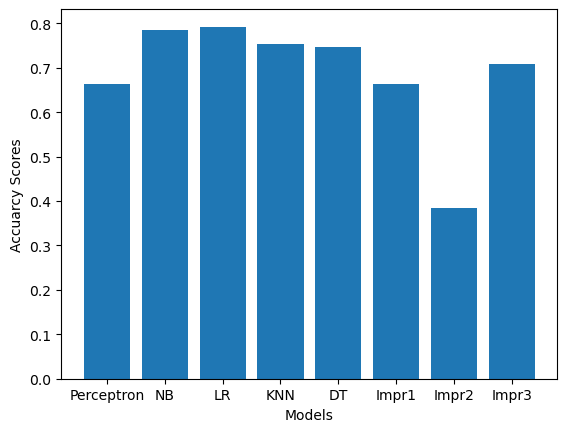

<Figure size 20000x10000 with 0 Axes>

In [192]:
plt.bar(['Perceptron','NB','LR','KNN','DT','Impr1','Impr2','Impr3'],[acc1,acc2,acc3,acc4,acc5,acc6,acc7,acc8])
plt.xlabel('Models')
plt.ylabel('Accuarcy Scores')

plt.figure(figsize=(200,100))

In [193]:
#Creating a bar chart for Precision score

<Figure size 20000x10000 with 0 Axes>

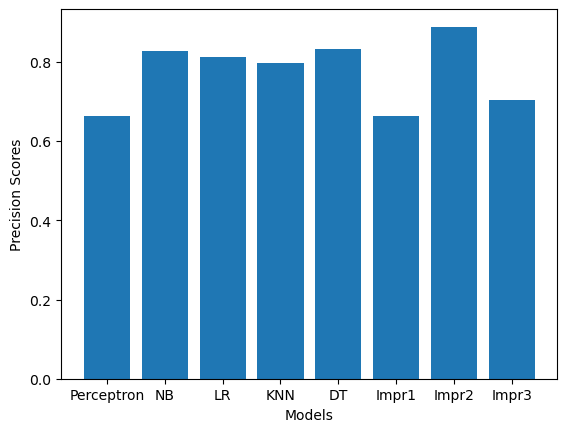

<Figure size 20000x10000 with 0 Axes>

In [194]:
plt.bar(['Perceptron','NB','LR','KNN','DT','Impr1','Impr2','Impr3'],[precision1,precision2,precision3,precision4,precision5,precision6,precision7,precision8])
plt.xlabel('Models')
plt.ylabel('Precision Scores')

plt.figure(figsize=(200,100))

In [195]:
#Creating a bar chart for Recall score

<Figure size 20000x10000 with 0 Axes>

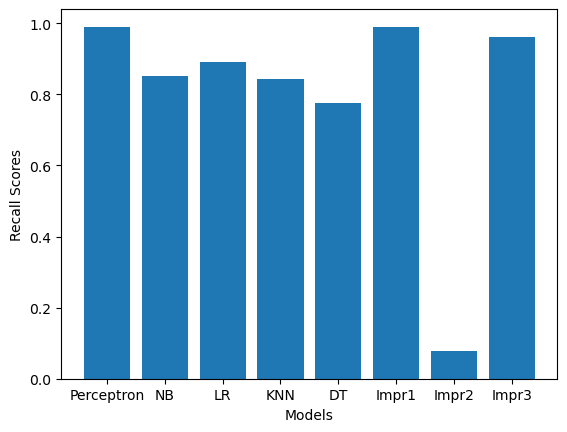

<Figure size 20000x10000 with 0 Axes>

In [196]:
plt.bar(['Perceptron','NB','LR','KNN','DT','Impr1','Impr2','Impr3'],[recall1,recall2,recall3,recall4,recall5,recall6,recall7,recall8])
plt.xlabel('Models')
plt.ylabel('Recall Scores')

plt.figure(figsize=(200,100))

In [197]:
#Creating a bar chart for F1 score

<Figure size 20000x10000 with 0 Axes>

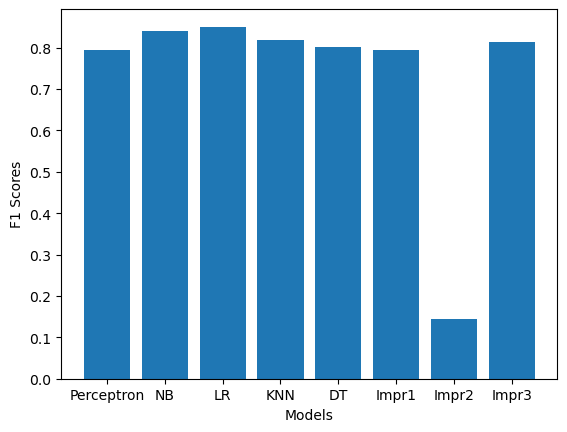

<Figure size 20000x10000 with 0 Axes>

In [198]:
plt.bar(['Perceptron','NB','LR','KNN','DT','Impr1','Impr2','Impr3'],[f1_score_1,f1_score_2,f1_score_3,f1_score_4,f1_score_5,f1_score_6,f1_score_7,f1_score_8])
plt.xlabel('Models')
plt.ylabel('F1 Scores')

plt.figure(figsize=(200,100))